Aim of this project is to build and train a convolutional neural network (CNN) to classify handwritten digits using the renowned [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The MNIST dataset contains 60,000 training images and 10,000 test images, with classes representing the digits 0-9.

# **1. Import Libraries**



In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import seaborn as sns
import pandas as pd
from tensorflow.keras import layers, models


# **2. Dataset**

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Preprocess the training images
train_images = train_images[..., np.newaxis] / 255.0
train_images = train_images.astype(np.float32)

# Preprocess the training labels
train_labels = train_labels.astype(np.int64)

# Preprocess the test images
test_images = test_images[..., np.newaxis] / 255.0
test_images = test_images.astype(np.float32)

# Preprocess the test labels
test_labels = test_labels.astype(np.int64)

11490434/11490434 [==============================] - 0s 0us/step


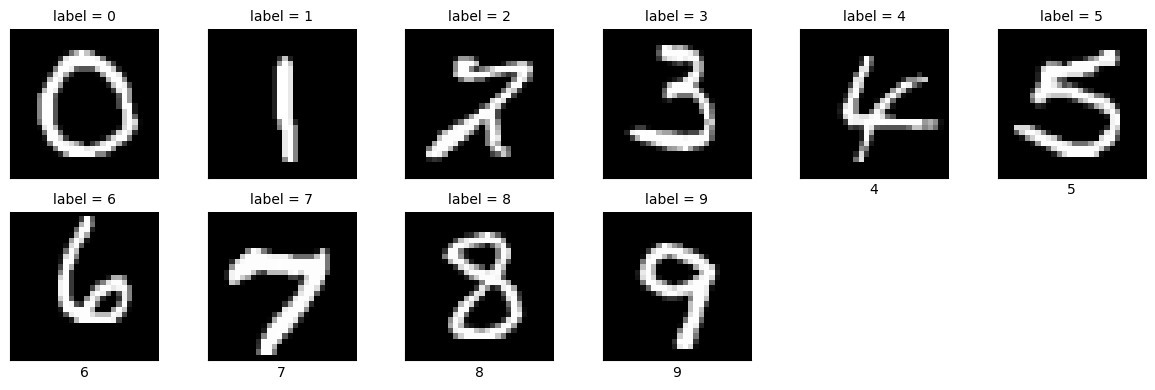

In [5]:
# DataFrame containing the images and labels
random_indices = np.random.randint(0, train_images.shape[0], size=36)
images = train_images[random_indices].squeeze()
labels = train_labels[random_indices]

# Convert images to list of flattened arrays and labels to a DataFrame
df = pd.DataFrame({
    'label': labels
})
df['image'] = [images[i] for i in range(len(images))]

def plot_image(data, **kwargs):
    image = data['image'].values[0]
    label = data['label'].values[0]
    ax = plt.gca()
    ax.imshow(image, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(label)

# Create a FacetGrid and map the images to it
g = sns.FacetGrid(df, col='label', col_wrap=6, height=2)
g.map_dataframe(plot_image)

# Adjust layout
plt.tight_layout()
plt.show()

# **3. First solution for classification: Neural Network**

# 3.1. Structure of fully connected neural network

In [7]:
# Define the fully connected model
def build_fc_model():
    fc_model = models.Sequential()
    fc_model.add(layers.Flatten(input_shape=(28, 28, 1)))  # Assuming the input shape is 28x28x1
    fc_model.add(layers.Dense(128, activation='relu'))
    fc_model.add(layers.Dense(10, activation='softmax'))
    return fc_model


model = build_fc_model()

# 3.2. Compile the model

- **Loss function**: This determines how we assess the model's accuracy during training. Goal is to minimize this function, guiding the model in the correct direction.
- **Optimizer**: This specifies how the model is updated based on the input data and the loss function.
- **Metrics**: These are used to monitor the training and testing phases. Accuracy will be used as a metric, which measures the proportion of correctly classified images.

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3.3. Train the model

In [9]:
batch_size = 64
epochs = 5
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)

Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.3012 - accuracy: 0.9145
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.1412 - accuracy: 0.9600
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0987 - accuracy: 0.9713
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0755 - accuracy: 0.9778
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0596 - accuracy: 0.9822


Achieved accuracy on **train data is around 98%.**

# 3.4. Evaluate accuracy on the test datasets

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy is equal to:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0822 - accuracy: 0.9757
Test accuracy is equal to: 0.9757000207901001


Conclusion: The accuracy on the test dataset is slightly less than the one the train datasets, indicating a potential overfitting issue. What else can be proposed as a solution for this problem other than NN?

# **4. Second solution for classification: Convolutional Neural Network**

In [15]:
def build_cnn_model():
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(24, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # First max pooling layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(layers.Conv2D(36, (3, 3), activation='relu'))

    # Second max pooling layer
    model.add(layers.MaxPooling2D((3, 3)))

    # Flatten layer
    model.add(layers.Flatten())

    # Dense layer
    model.add(layers.Dense(64, activation='relu'))

    # Output layer
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Build the CNN model
cnn_model = build_cnn_model()

# Initialize the model by passing some data through
cnn_model.predict(train_images[:1])

# Print the summary of the layers in the model
cnn_model.summary()


1/1 [==============================] - 0s 127ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 36)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 324)               0         
                                                                 
 

# 4.1. Train and test CNN model

In [16]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn_model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)


Epoch 1/5
938/938 [==============================] - 36s 37ms/step - loss: 0.2555 - accuracy: 0.9259
Epoch 2/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0776 - accuracy: 0.9760
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0577 - accuracy: 0.9823
Epoch 4/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0459 - accuracy: 0.9857
Epoch 5/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0381 - accuracy: 0.9881


In [19]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy for CNN model is ', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0442 - accuracy: 0.9855
Test accuracy for CNN model is  0.9854999780654907


Conclusion: Accuracy on test dataset **CNN (~99%)** is higher than that of **NN (~97%)**

# 4.2. Make predictions on CNN model

In [20]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 5s 16ms/step


''

In [27]:
predictions[5]


array([1.5955267e-06, 9.9955279e-01, 2.0671587e-06, 2.7573169e-08,
       2.8893710e-04, 3.1974841e-07, 8.4332828e-07, 1.4675361e-04,
       3.4567786e-06, 3.0554008e-06], dtype=float32)

The prediction is an array of 10 numbers, representing the probability distribution across the 10 digit classes. This output indicates the model's confidence level for the image corresponding to each of the 10 possible digits.

In [49]:
#the digit that has the highest confidence for the first image in the test dataset:
prediction = np.argmax(predictions[5])
print(prediction)


1


Label of this digit is: 1


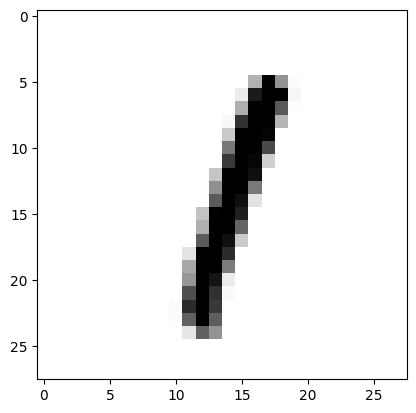

In [50]:
print("Label of this digit is:", test_labels[5])
plt.imshow(test_images[5, :, :, 0], cmap=plt.cm.binary)
plt.show()

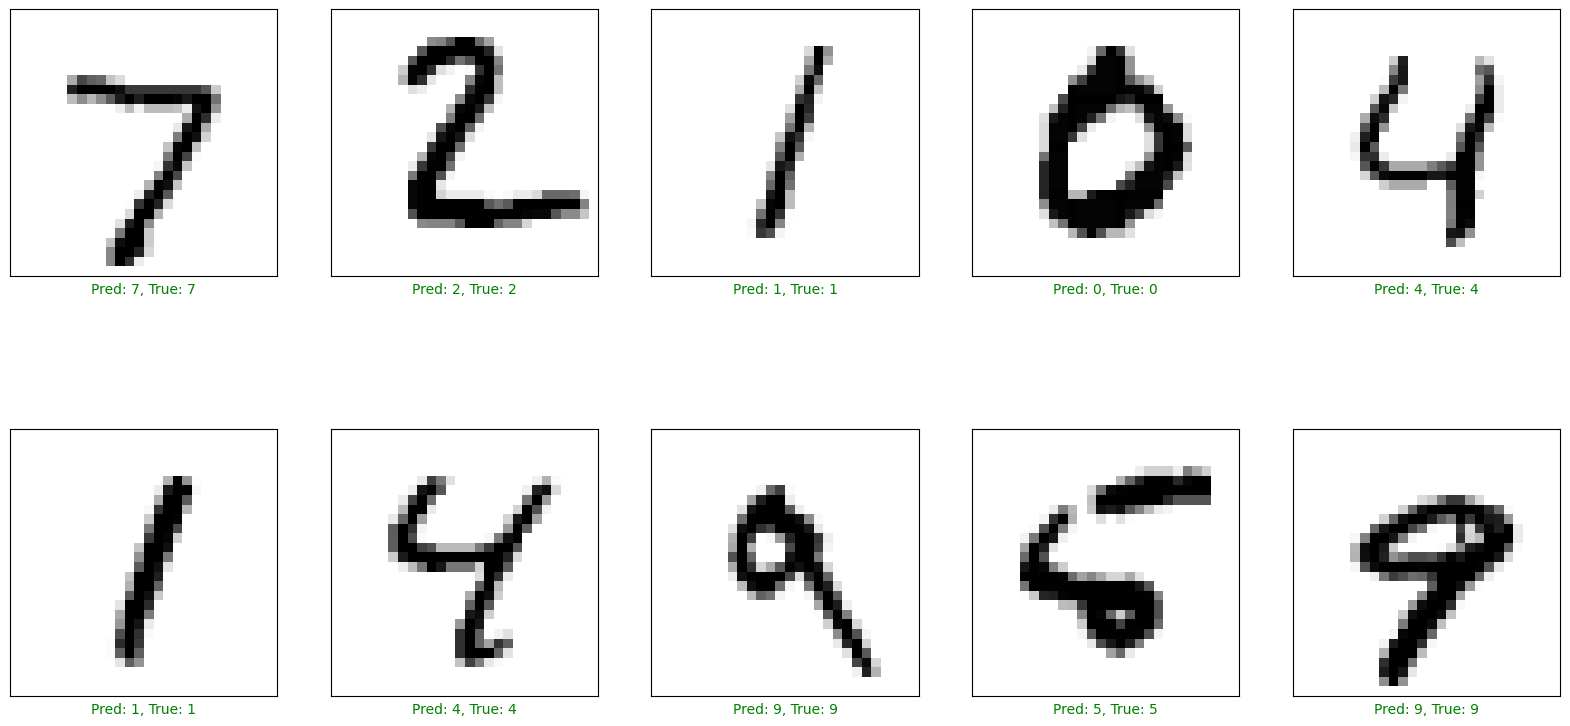

In [51]:
# Define a function to plot images with their predicted labels
def plot_images(images, labels, predictions, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].squeeze(), cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i]
        color = 'green' if predicted_label == true_label else 'red'
        plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color=color)
    plt.show()

# Plot images from the test dataset with their predicted labels
plot_images(test_images, test_labels, predictions)

# 5. Train the model using lower-level training approach with `tf.GradientTape`

1. **Greater Control**: It provides more flexibility to customize and control the training process, such as implementing custom training loops and handling specific training behaviors.
2. **Detailed Insights**: This method offers a deeper understanding of how backpropagation and gradient updates work, which is essential for debugging and optimizing model performance.
3. **Advanced Customization**: It is useful for implementing advanced training techniques that are not easily achievable with the high-level `fit` method, such as custom loss functions, dynamic learning rates, or specialized gradient updates.



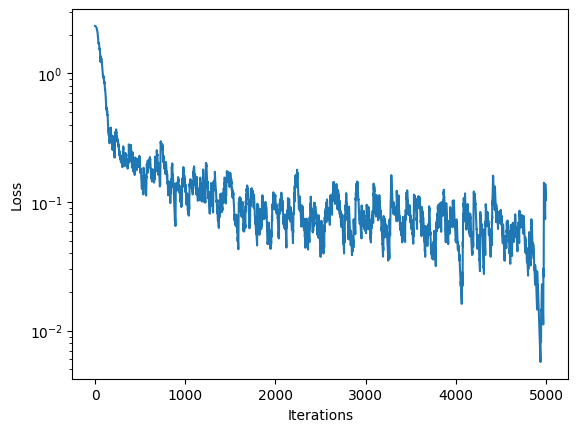

100%|██████████| 5000/5000 [03:59<00:00, 20.88it/s]


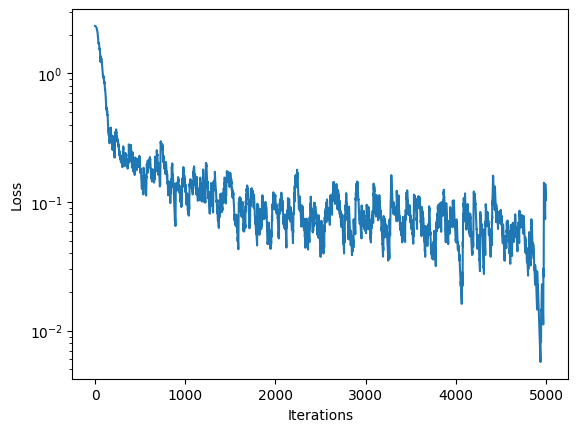

In [53]:
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl
def build_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(24, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(36, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Initialize the model
cnn_model = build_cnn_model()

# Define batch size and optimizer
batch_size = 12
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Record the loss evolution and initialize the plotter
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')

# Clear tqdm instances if any
if hasattr(tqdm, '_instances'): tqdm._instances.clear()

# Training loop
for start_idx in tqdm(range(0, len(train_images), batch_size)):
    end_idx = start_idx + batch_size
    batch_images = train_images[start_idx:end_idx]
    batch_labels = train_labels[start_idx:end_idx]

    # Convert to tensors
    batch_images = tf.convert_to_tensor(batch_images, dtype=tf.float32)

    # GradientTape to record differentiation operations
    with tf.GradientTape() as tape:
        # Feed the images into the model and obtain the predictions
        logits = cnn_model(batch_images)

        # Compute the categorical cross entropy loss
        loss_value = tf.keras.losses.sparse_categorical_crossentropy(batch_labels, logits)

    # Append the loss to the loss history
    loss_history.append(loss_value.numpy().mean())
    plotter.plot(loss_history.get())

    # Compute the gradients and apply them
    grads = tape.gradient(loss_value, cnn_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))

For the last part of the question:
© MIT Introduction to Deep Learning
http://introtodeeplearning.com